In [1]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\rines\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# Load the dataset
df = pd.read_csv('All_Sa_weather_5_years.csv')

df = df.drop(columns=['pan_ev'])

# Display the first few rows
print(df.head())
df.shape

           station_name        date ev_transpiration rain max_temp min_temp  \
0  ADELAIDE (KENT TOWN)  01/08/2019              1.1  0.0     14.0      9.2   
1  ADELAIDE (KENT TOWN)  02/08/2019              1.0  0.0     13.7      5.4   
2  ADELAIDE (KENT TOWN)  03/08/2019              1.0  0.2     14.2      9.0   
3  ADELAIDE (KENT TOWN)  04/08/2019              1.5  0.0     16.7      6.4   
4  ADELAIDE (KENT TOWN)  05/08/2019                   0.0               5.6   

  max_humid min_humid  wind  solar  
0      92.0      59.0  1.08   8.14  
1      94.0      74.0  0.95   8.22  
2      87.0      59.0  0.75   6.85  
3      91.0      39.0  1.17  12.74  
4      79.0      25.0  1.19  13.36  


(102151, 10)

In [4]:
# Adjust column types
# Convert numeric columns to appropriate data types
numeric_columns = ['ev_transpiration', 'rain', 'max_temp', 'min_temp', 'max_humid', 'min_humid', 'wind', 'solar']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Sort values
df = df.sort_values(['station_name','date'])

## fill nan value with mean
for col in numeric_columns:
    df[col] = df[col].fillna(df[col].mean())

# Summary statistics
print("Summary Statistics:")
print(df.describe())

Summary Statistics:
                                date  ev_transpiration           rain  \
count                         102151     102151.000000  102151.000000   
mean   2022-01-20 02:13:28.097815808          4.410220       1.102176   
min              2019-08-01 00:00:00          0.300000       0.000000   
25%              2020-10-25 00:00:00          2.300000       0.000000   
50%              2022-01-16 00:00:00          4.000000       0.000000   
75%              2023-04-10 00:00:00          5.900000       0.400000   
max              2024-07-31 00:00:00         20.500000     109.400000   
std                              NaN          2.658428       3.618198   

            max_temp       min_temp      max_humid      min_humid  \
count  102151.000000  102151.000000  102151.000000  102151.000000   
mean       22.562805      10.841168      83.588926      41.189810   
min         4.900000      -5.300000       8.000000       0.000000   
25%        17.000000       7.100000      78.00

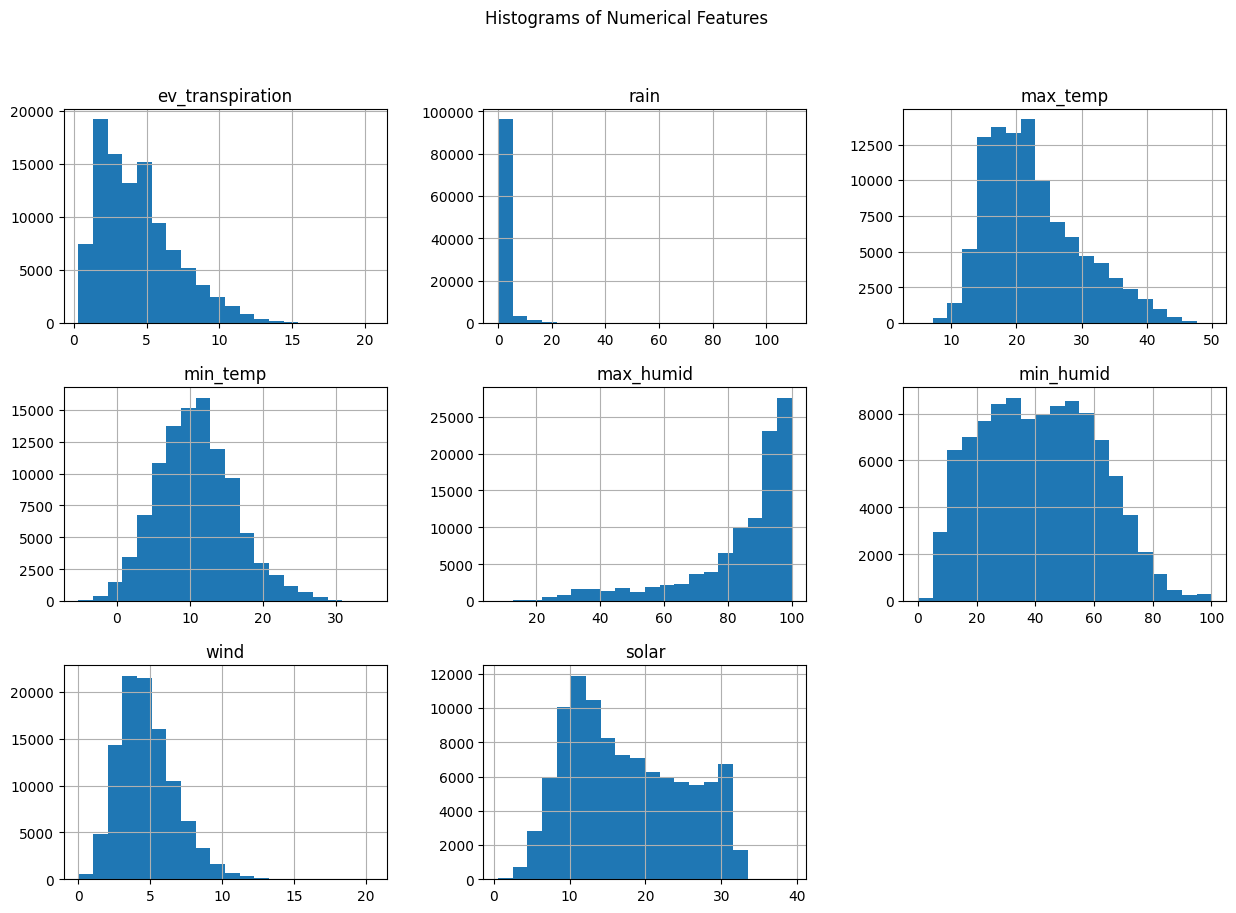

In [5]:
# Plotting histograms for numerical features
df[numeric_columns].hist(figsize=(15, 10), bins=20)
plt.suptitle('Histograms of Numerical Features')
plt.show()

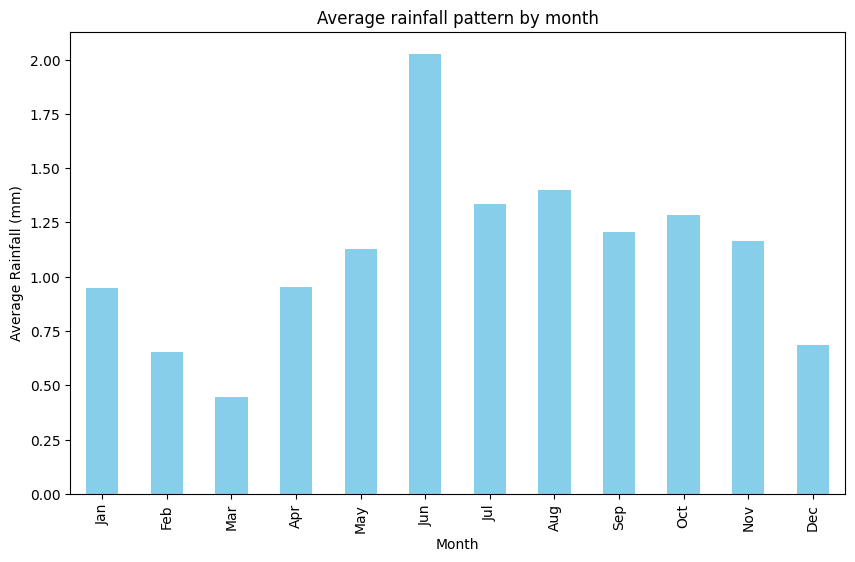

In [6]:
# Extract month and year for easier analysis
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

# Group by month to calculate the average rainfall for each month
monthly_rain_pattern = df.groupby('month')['rain'].mean()

# Plot the monthly rainfall pattern
plt.figure(figsize=(10, 6))
monthly_rain_pattern.plot(kind='bar', color='skyblue')
plt.title('Average rainfall pattern by month')
plt.xlabel('Month')
plt.ylabel('Average Rainfall (mm)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


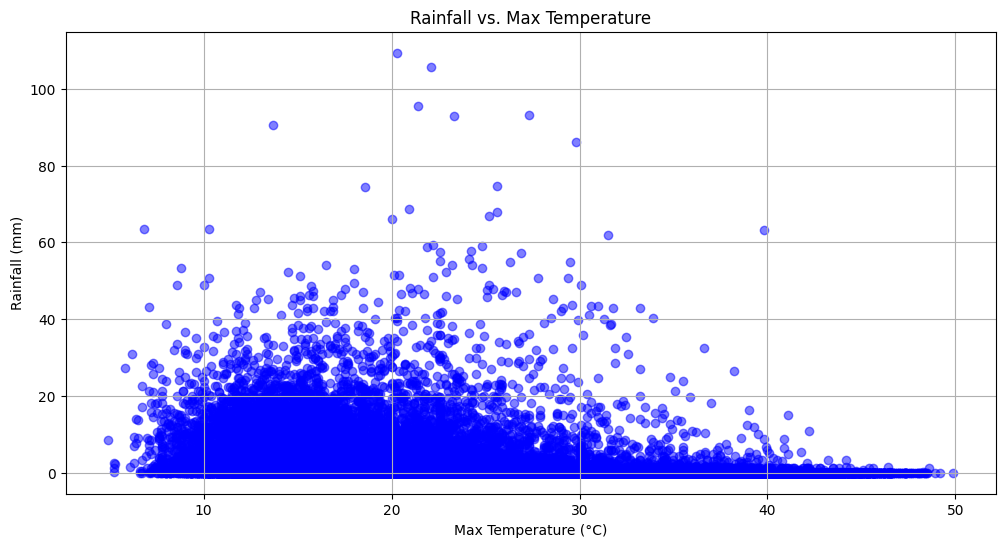

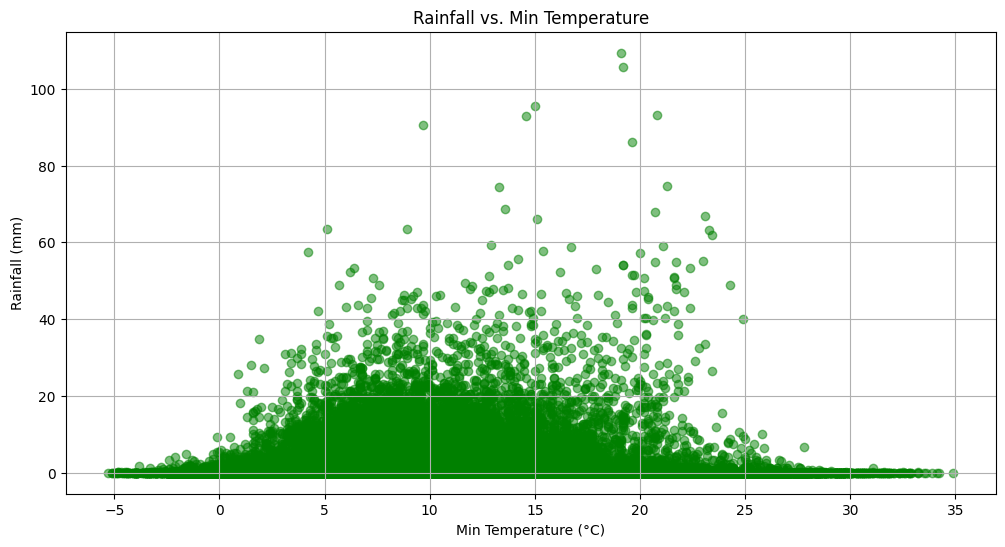

In [7]:
import matplotlib.pyplot as plt

# Scatter plot: Rain vs. Max Temperature
plt.figure(figsize=(12, 6))
plt.scatter(df['max_temp'], df['rain'], color='blue', alpha=0.5)
plt.title('Rainfall vs. Max Temperature')
plt.xlabel('Max Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

# Scatter plot: Rain vs. Min Temperature
plt.figure(figsize=(12, 6))
plt.scatter(df['min_temp'], df['rain'], color='green', alpha=0.5)
plt.title('Rainfall vs. Min Temperature')
plt.xlabel('Min Temperature (°C)')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()


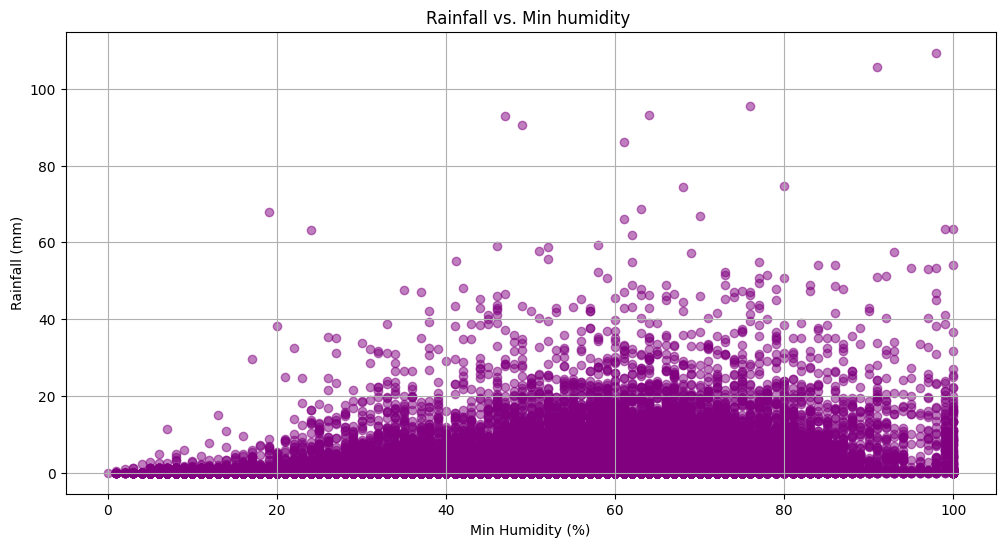

In [8]:
# Scatter plot: Rain vs. Min humidity
plt.figure(figsize=(12, 6))
plt.scatter(df['min_humid'], df['rain'], color='purple', alpha=0.5)
plt.title('Rainfall vs. Min humidity ')
plt.xlabel('Min Humidity (%)')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

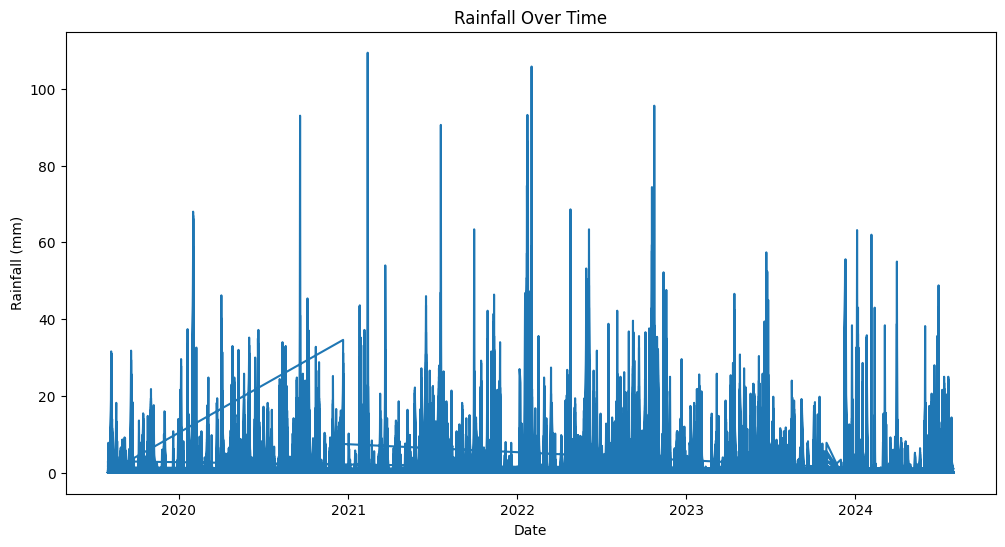

In [12]:
# Time series plot for rainfall over time
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['rain'], label='Rainfall')
plt.xlabel('Date')
plt.ylabel('Rainfall (mm)')
plt.title('Rainfall Over Time')
plt.show()

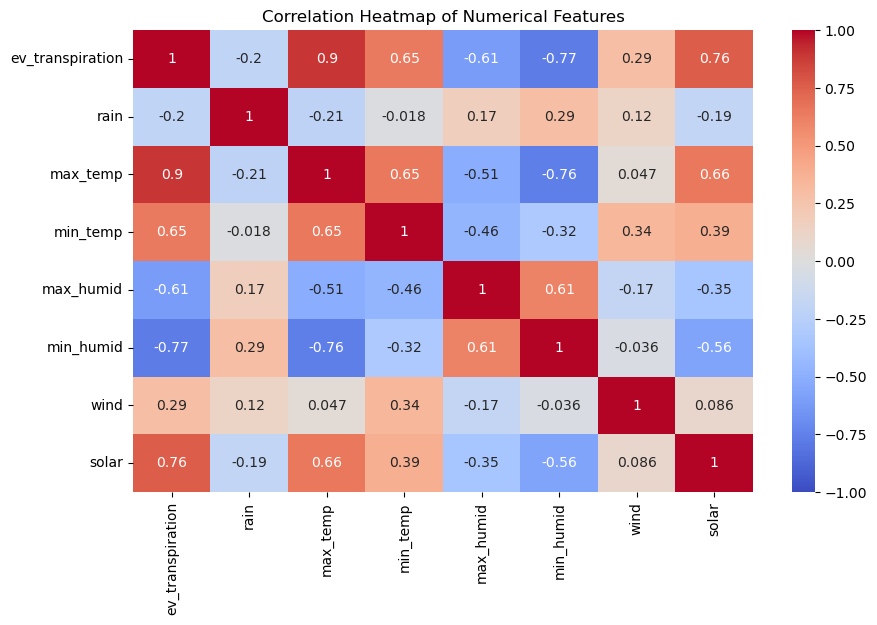

In [8]:
# Plotting correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [9]:
# Aggregate rainfall by station
total_rainfall_by_station = df.groupby('station_name')['rain'].sum()

# Get the top 10 stations with the highest total rainfall
top_10_stations = total_rainfall_by_station.nlargest(10)

In [10]:
print(top_10_stations)

station_name
MOUNT LOFTY                      4748.002251
PARAWA (SECOND VALLEY FOREST)    3976.021906
KUITPO FOREST RESERVE            3873.647862
MOUNT GAMBIER AERO               3519.571793
MOUNT CRAWFORD                   3333.519580
PARNDANA CFS                     2835.371793
ROBE AIRFIELD                    2831.473969
CLARE HIGH SCHOOL                2531.954539
CAPE BORDA                       2524.680570
COONAWARRA                       2469.843511
Name: rain, dtype: float64


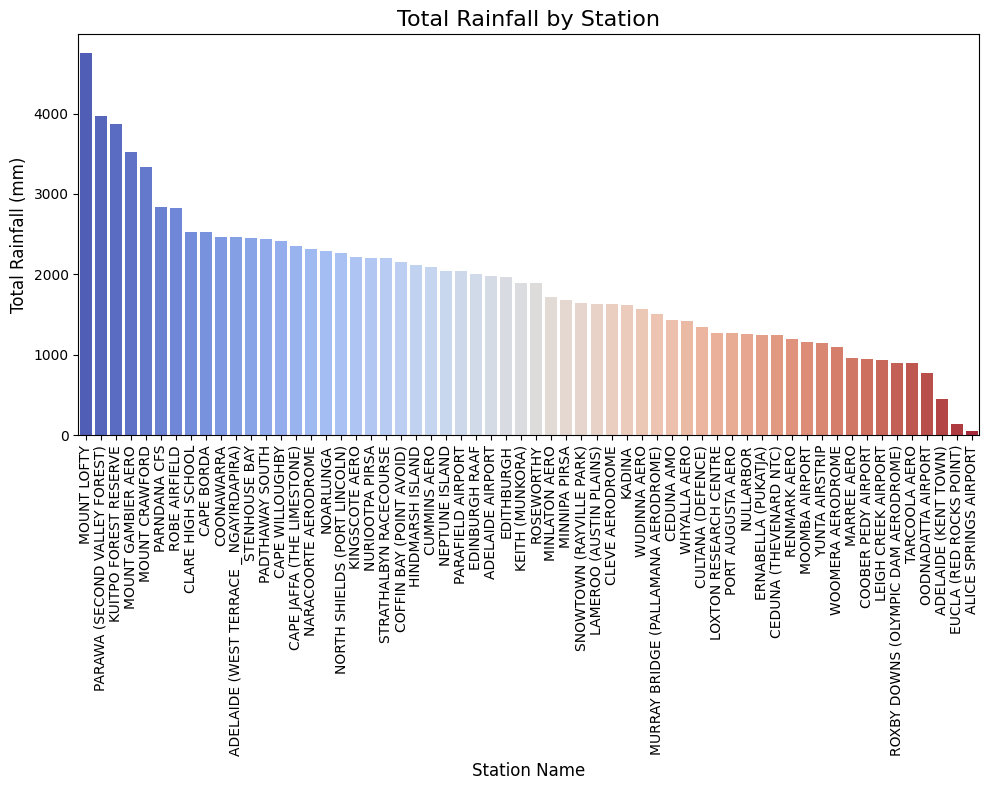

In [11]:
# Assuming 'total_rainfall_by_station' is a Pandas Series with station names as index
# Example dummy data creation if not provided
# total_rainfall_by_station = pd.Series({
#    'Station1': 120, 'Station2': 95, 'Station3': 140, 'Station4': 110, 'Station5': 160, 'Station6': 85
# })

# Sort total rainfall by station in descending order
total_rainfall_sorted = total_rainfall_by_station.sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(10, 8))
sns.barplot(x=total_rainfall_sorted.index, y=total_rainfall_sorted.values, palette="coolwarm")

# Add titles and labels
plt.title('Total Rainfall by Station', fontsize=16)
plt.xlabel('Station Name', fontsize=12)
plt.ylabel('Total Rainfall (mm)', fontsize=12)

# Rotate station names on x-axis for better readability
plt.xticks(rotation=90, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

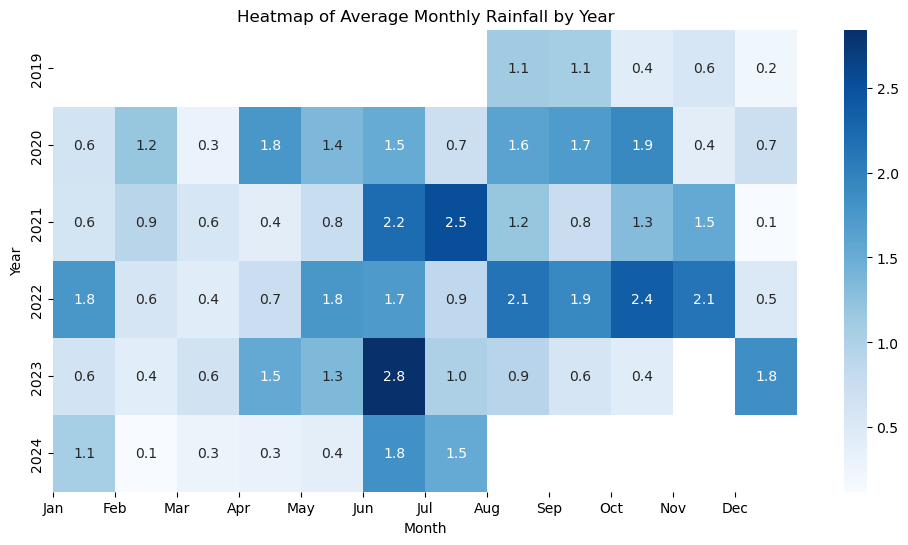

In [12]:
#Rainfall distribution heatmap by year and month
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract year and month for analysis
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Group by year and month to get average rainfall
pivot_table = df.pivot_table(values='rain', index='year', columns='month', aggfunc='mean')

# Plot a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt=".1f")
plt.title('Heatmap of Average Monthly Rainfall by Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In [ ]:
#df.to_csv("Final_data2.csv", encoding='utf-8')